In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('happyscore_income.csv')
df.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


In [2]:
df1 = df.drop(['country','adjusted_satisfaction','std_satisfaction','median_income','income_inequality','region','country.1'], axis = 'columns')
df1

,avg_satisfaction,avg_income,happyScore,GDP
0,4.9,2096.76,4.350,0.76821
1,4.3,1448.88,4.033,0.75778
2,7.1,7101.12,6.574,1.05351
3,7.2,19457.04,7.200,1.33723
4,7.6,19917.00,7.284,1.33358
...,...,...,...,...
106,7.0,7544.40,6.485,1.06166
107,6.1,2231.40,5.360,0.63216
108,6.3,3889.32,4.642,0.92049
109,5.0,956.76,5.129,0.47038


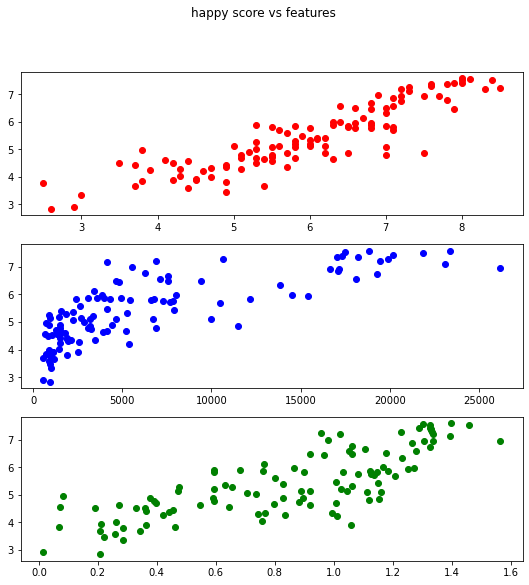

In [3]:
plt.figure(figsize=(9, 9))

plt.subplot(311)
plt.scatter(df1['avg_satisfaction'],df1['happyScore'],color='r')

plt.subplot(312)
plt.scatter(df1['avg_income'],df1['happyScore'],color='b')

plt.subplot(313)
plt.scatter(df1['GDP'],df1['happyScore'],color='g')

plt.suptitle('happy score vs features')
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df1[['avg_satisfaction','avg_income','happyScore','GDP']])
df1[['avg_satisfaction','avg_income','happyScore','GDP']] = scaler.transform(df1[['avg_satisfaction','avg_income','happyScore','GDP']])
df1

,avg_satisfaction,avg_income,happyScore,GDP
0,0.400000,0.059505,0.318239,0.486184
1,0.300000,0.034206,0.251474,0.479449
2,0.766667,0.254916,0.786647,0.670414
3,0.783333,0.737392,0.918492,0.853624
4,0.850000,0.755352,0.936184,0.851267
...,...,...,...,...
106,0.750000,0.272225,0.767902,0.675677
107,0.600000,0.064762,0.530960,0.398331
108,0.633333,0.129501,0.379739,0.584518
109,0.416667,0.014990,0.482308,0.293864


In [5]:
x = df1.drop(['happyScore'],axis = 'columns')
y = df1[['happyScore']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [7]:
model.score(x_test,y_test)

0.8273082441093345

In [8]:
df1.to_csv('happyscore_income(clean).csv')

In [11]:
import joblib
joblib.dump(model,'happyscoreprediction')

['happyscoreprediction']